In [1]:
import numpy as np
import pandas as pd
#import datetime as dt
import pymongo
import json
import datetime as dt
import pickle

In [2]:
#import os
from bs4 import BeautifulSoup as bs
#import requests
from splinter import Browser
import time

# Scrape Data and Organize

In [3]:
# create mongo db connection
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
# connect to my nba data db
db = client.nba_data_db

In [447]:
# drop any items in training data collection
db.training_data.drop()

In [439]:
# Url to get all boxscores for 2017-2018 regular season games
nba_17_18_boxscores_url = "https://stats.nba.com/teams/boxscores-advanced/?Season=2017-18&SeasonType=Regular%20Season"
nba_17_18_fourfactor_url = "https://stats.nba.com/teams/boxscores-four-factors/?Season=2017-18&SeasonType=Regular%20Season"

In [129]:
# create splinter browser
def init_browser():
    executable_path = {'executable_path': 'chromedriver.exe'}
    browser = Browser('chrome', **executable_path, headless=False)
    return browser

browser = init_browser()

In [440]:
# visit website
browser.visit(nba_17_18_boxscores_url)
time.sleep(3)

In [441]:
# get click path by xpath from browser inspector
sel_all_path = browser.find_by_xpath("/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]")
# select to display all games
sel_all_path.click()
time.sleep(5)
# parse html in soup
html = browser.html
# Parse with soup
soup = bs(html, 'html.parser')
# Find all tables
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))
# drop season column since unneeded
new_df = df[0].drop(columns=['Season'])
# Rename column names
new_df.rename(columns={"Game\xa0Date": "GameDate", "Match\xa0Up": "MatchUp"}, inplace=True)
# change gamedate to datetime
new_df['GameDate'] = new_df['GameDate'].apply(lambda x: dt.datetime.strptime(x, "%m/%d/%Y"))
# export to json
#items = new_df.to_json(orient='records', date_format='iso')
# load json string to json
#items_db = json.loads(items)

In [442]:
# visit website
browser.visit(nba_17_18_fourfactor_url)
time.sleep(3)

In [443]:
# get click path by xpath from browser inspector
sel_all_path = browser.find_by_xpath("/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]")
# select to display all games
sel_all_path.click()
time.sleep(5)
# parse html in soup
html = browser.html
# Parse with soup
soup = bs(html, 'html.parser')
# Find all tables
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))
# drop season column since unneeded
df = df[0].drop(columns=['Season'])
# Rename columns
df.rename(columns={"Game\xa0Date": "GameDate", "Match\xa0Up": "MatchUp", "OppFTA\xa0Rate": "OppFTARate"}, inplace=True)
# Convert to float percent values
df['OREB%'] = df['OREB%'].str.rstrip('%').astype('float')
df['OppOREB%'] = df['OppOREB%'].str.rstrip('%').astype('float')
df['OppeFG%'] = df['OppeFG%'].str.rstrip('%').astype('float')
df['eFG%'] = df['eFG%'].str.rstrip('%').astype('float')
# change gamedate to datetime
df['GameDate'] = df['GameDate'].apply(lambda x: dt.datetime.strptime(x, "%m/%d/%Y"))
# export to json
#items = new_df.to_json(orient='records', date_format='iso')
# load json string to json
#items_db = json.loads(items)

In [444]:
df = df.drop(['MIN', 'MatchUp', 'W/L', 'eFG%', 'OREB%', 'TOV%'], axis=1)

In [445]:
len(df)

2460

In [446]:
result = pd.merge(new_df, df, on=['Team', 'GameDate'])

In [15]:
result.columns

Index(['Team', 'MatchUp', 'GameDate', 'W/L', 'MIN', 'OffRtg', 'DefRtg',
       'NetRtg', 'AST%', 'AST/TO', 'ASTRatio', 'OREB%', 'DREB%', 'REB%',
       'TOV%', 'eFG%', 'TS%', 'PACE', 'PIE', 'FTARate', 'OppeFG%',
       'OppFTARate', 'OppTOV%', 'OppOREB%'],
      dtype='object')

In [16]:
result_training_df = result.copy()

In [131]:
nba_18_19_boxscores_url = "https://stats.nba.com/teams/boxscores-advanced/"
nba_18_19_fourfactor_url = "https://stats.nba.com/teams/boxscores-four-factors/"

In [430]:
# drop any items in training data collection
db.testing_data.drop()

In [132]:
# visit website
browser.visit(nba_18_19_boxscores_url)
time.sleep(3)

In [133]:
# get click path by xpath from browser inspector
sel_all_path = browser.find_by_xpath("/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]")
# select to display all games
sel_all_path.click()
time.sleep(5)
# parse html in soup
html = browser.html
# Parse with soup
soup = bs(html, 'html.parser')
# Find all tables
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))
# drop season column since unneeded
new_df = df[0].drop(columns=['Season'])
# Rename column names
new_df.rename(columns={"Game\xa0Date": "GameDate", "Match\xa0Up": "MatchUp"}, inplace=True)
# change gamedate to datetime
new_df['GameDate'] = new_df['GameDate'].apply(lambda x: dt.datetime.strptime(x, "%m/%d/%Y"))
# export to json
#items = new_df.to_json(orient='records', date_format='iso')
# load json string to json
#items_db = json.loads(items)

In [134]:
# visit website
browser.visit(nba_18_19_fourfactor_url)
time.sleep(3)

In [135]:
# get click path by xpath from browser inspector
sel_all_path = browser.find_by_xpath("/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]")
# select to display all games
sel_all_path.click()
time.sleep(5)
# parse html in soup
html = browser.html
# Parse with soup
soup = bs(html, 'html.parser')
# Find all tables
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))
# drop season column since unneeded
df = df[0].drop(columns=['Season'])
# Rename columns
df.rename(columns={"Game\xa0Date": "GameDate", "Match\xa0Up": "MatchUp", "OppFTA\xa0Rate": "OppFTARate"}, inplace=True)
# Convert to float percent values
df['OREB%'] = df['OREB%'].str.rstrip('%').astype('float')
df['OppOREB%'] = df['OppOREB%'].str.rstrip('%').astype('float')
df['OppeFG%'] = df['OppeFG%'].str.rstrip('%').astype('float')
df['eFG%'] = df['eFG%'].str.rstrip('%').astype('float')
# change gamedate to datetime
df['GameDate'] = df['GameDate'].apply(lambda x: dt.datetime.strptime(x, "%m/%d/%Y"))
# export to json
#items = new_df.to_json(orient='records', date_format='iso')
# load json string to json
#items_db = json.loads(items)

In [136]:
df = df.drop(['MIN', 'MatchUp', 'W/L', 'eFG%', 'OREB%', 'TOV%'], axis=1)

In [137]:
result_new = pd.merge(new_df, df, on=['Team', 'GameDate'])

In [138]:
len(result_new)

1516

In [448]:
df_winloss = pd.concat([result, result_new])

In [449]:
df_winloss = df_winloss.groupby(['W/L'])['AST%', 'AST/TO', 'ASTRatio', 'DREB%', 
                                     'DefRtg','OREB%', 'OffRtg', 'PACE', 
                                     'PIE', 'REB%', 'TOV%','TS%',
                                     'eFG%', 'FTARate', 'OppFTARate', 'OppOREB%',
                                     'OppTOV%', 'OppeFG%'].mean()

In [450]:
df_winloss = df_winloss.reset_index()

In [451]:
db.nba_stats_data.drop()

In [452]:
# export to json
items = df_winloss.to_json(orient='records')
# load json string to json
items_db = json.loads(items)

In [453]:
# insert data to collection
db.nba_stats_data.insert_many(items_db)

In [33]:
df_winloss.head()

,W/L,AST%,AST/TO,ASTRatio,DREB%,DefRtg,OREB%,OffRtg,PACE,PIE,REB%,TOV%,TS%,eFG%,FTARate,OppFTARate,OppOREB%,OppTOV%,OppeFG%
0,L,57.715854,1.618132,16.250795,72.448743,113.929400,25.942227,102.535403,99.069733,43.054643,48.119035,14.767111,52.923037,49.366290,0.247958,0.269453,27.552232,14.003592,55.202514
1,W,59.911339,1.959913,18.224885,74.059312,102.535403,27.552232,113.929400,99.069733,56.945818,51.881734,14.003592,58.682914,55.202514,0.269453,0.247958,25.942227,14.767111,49.366290


In [34]:
#result['OffEff'] = np.where(result['OffRtg']>=df_winloss.loc[1,'OffRtg'], 1, 0)
#result['DefEff'] = np.where(result['DefRtg']<=df_winloss.loc[1,'DefRtg'], 1, 0)

In [35]:
#result_new['OffEff'] = np.where(result_new['OffRtg']>=df_winloss.loc[1,'OffRtg'], 1, 0)
#result_new['DefEff'] = np.where(result_new['DefRtg']<=df_winloss.loc[1,'DefRtg'], 1, 0)

In [454]:
# export to json
items = result.to_json(orient='records', date_format='iso')
# load json string to json
items_db = json.loads(items)

In [455]:
# insert data to collection
db.training_data.insert_many(items_db)

In [437]:
# export to json
items = result_new.to_json(orient='records', date_format='iso')
# load json string to json
items_db = json.loads(items)

In [438]:
# insert data to collection
db.testing_data.insert_many(items_db)

# Create Four Factor Model

In [17]:
temp = db.training_data.find()
temp = list(temp)
for i in temp:
    i.pop('_id', None)

In [18]:
df = pd.DataFrame(temp)
df.head()

,+/-,3P%,3PA,3PM,AST,AST%,AST/TO,ASTRatio,BLK,DREB,...,PTS,REB,REB%,STL,TOV,TOV%,TS%,Team,W/L,eFG%
0,-1,53.3,30,16,34,79.1,2.00,23.9,9,35,...,121,41,45.2,5,17,16.7,67.8,GSW,L,63.8
1,3,22.7,22,5,19,50.0,1.12,14.8,4,41,...,102,50,51.9,3,17,17.3,54.3,CLE,W,48.8
2,1,36.6,41,15,28,59.6,2.15,18.9,5,33,...,122,43,54.8,9,13,12.7,57.9,HOU,W,56.2
3,-3,25.0,32,8,24,66.7,2.00,17.9,4,37,...,99,46,48.1,11,12,12.1,50.0,BOS,L,45.5
4,9,26.5,34,9,29,54.7,2.07,17.6,9,33,...,140,47,52.4,12,14,12.0,60.3,IND,W,56.4


In [19]:
X = df.loc[:,['eFG%', 'FTARate', 'TOV%', 'OREB%', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
y = df['W/L']

In [398]:
# Split the data using train_test_split
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [399]:
X_scaler = StandardScaler().fit(X)
X_train_scaled = X_scaler.transform(X)

In [400]:
from sklearn.externals import joblib

In [101]:
scaler_filename = "fourfactor_scaler.save"
joblib.dump(X_scaler, scaler_filename)

['fourfactor_scaler.save']

In [413]:
# Create a logistic regression model
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
fourfactor_model = LogisticRegression(verbose=1)


In [414]:
# Fit the model to the data
# YOUR CODE HERE
fourfactor_model.fit(X_train_scaled, y)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [415]:
fourfactor_model.coef_

array([[ 4.91329346,  0.99873369, -2.22702119,  2.01833405, -0.99873369,
        -2.01833405,  2.22702119, -4.91329346]])

In [404]:
temp = db.testing_data.find()
#temp = db.testing_data.find({'Team': 'LAL'})
temp = list(temp)
for i in temp:
    i.pop('_id', None)

In [405]:
df_test = pd.DataFrame(temp)
df_test.head()

,AST%,AST/TO,ASTRatio,DREB%,DefEff,DefRtg,FTARate,GameDate,MIN,MatchUp,...,OppTOV%,OppeFG%,PACE,PIE,REB%,TOV%,TS%,Team,W/L,eFG%
0,66.0,2.36,20.9,80.0,0,106.4,0.149,2019-01-24T00:00:00.000Z,48,OKC vs. NOP,...,11.0,53.5,109.5,52.8,55.0,12.7,56.7,OKC,W,56.4
1,65.9,2.90,19.9,79.5,0,121.2,0.221,2019-01-24T00:00:00.000Z,48,WAS vs. GSW,...,14.4,60.8,104.5,41.4,46.2,9.5,56.6,WAS,L,54.2
2,56.8,1.47,17.2,73.2,0,102.9,0.213,2019-01-24T00:00:00.000Z,48,POR @ PHX,...,15.5,48.3,103.0,60.1,55.7,16.5,58.4,POR,W,53.2
3,52.8,1.19,13.9,64.0,0,116.5,0.307,2019-01-24T00:00:00.000Z,48,PHX vs. POR,...,16.5,53.2,103.0,39.9,44.3,15.5,53.1,PHX,L,48.3
4,68.0,2.27,23.3,77.8,0,112.4,0.239,2019-01-24T00:00:00.000Z,48,GSW @ WAS,...,9.5,54.2,104.5,58.6,53.8,14.4,64.8,GSW,W,60.8


In [419]:
X_test = df_test.loc[:,['eFG%', 'FTARate', 'TOV%', 'OREB%', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
y_test = df_test['W/L']

In [420]:
X_test_scaled = X_scaler.transform(X_test)

In [421]:
# Make predictions using the X_test and y_test data
# Print at least 10 predictions vs their actual labels
# YOUR CODE HERE
predictions = fourfactor_model.predict(X_test_scaled)

In [422]:
len(predictions)

1438

In [424]:
# Print the r2 score for the test data
# YOUR CODE HERE
fourfactor_model.score(X_test_scaled, y_test)

0.9346314325452016

In [417]:
fourfactor_model.score(X_train_scaled, y)

0.9398373983739837

In [425]:
predictwincount = 0
actualwincount = 0
for x in range (len(predictions)):
    if(predictions[x] == 'W'):
        predictwincount += 1
    if(y[x] == 'W'):
        actualwincount += 1
print(f"Predicted W is {predictwincount}, actual is {actualwincount}")

Predicted W is 719, actual is 721


# Create next predictor

## Try using PACE

In [102]:
#X = result_new.loc[:,['TS%', 'FTARate', 'TOV%', 'OREB%', 'AST%', 'DREB%', 'PIE','OffEff', 'DefEff']]
#X = result_new.loc[:,['TS%', 'FTARate', 'TOV%', 'OREB%', 'AST%', 'DREB%', 'OffEff', 'DefEff', 'OppFTARate', 'OppOREB%',
#       'OppTOV%', 'OppeFG%']]
X = df.loc[:,['TS%', 'TOV%', 'OREB%', 'OffEff', 'DefEff', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%', 'PACE']]
y = df['W/L']

In [103]:
X_scaler = StandardScaler().fit(X)
X_train_scaled = X_scaler.transform(X)

In [58]:
newModel = LogisticRegression()

In [59]:
newModel.fit(X_train_scaled, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
X_test = df_test.loc[:,['TS%', 'TOV%', 'OREB%', 'OffEff', 'DefEff', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%', 'PACE']]
y_test = df_test['W/L']

In [64]:
X_test_scaled = X_scaler.transform(X_test)

In [90]:
# Print the r2 score for the test data
# YOUR CODE HERE
newModel.score(X_train_scaled, y)

0.9536585365853658

In [ ]:
newModel.score(X_test_scaled, y_test)

In [66]:
newModel.coef_

array([[ 5.708445  , -2.57058962,  2.40071017,  0.32193758,  0.85914937,
        -1.08230245, -2.11199394,  2.2960698 , -5.17168816,  0.08214409]])

In [67]:
# Make predictions using the X_test and y_test data
# Print at least 10 predictions vs their actual labels
# YOUR CODE HERE
predictions = newModel.predict(X_test_scaled)

In [69]:
predictwincount = 0
actualwincount = 0
for x in range (len(predictions)):
    if(predictions[x] == 'W'):
        predictwincount += 1
    if(y_test[x] == 'W'):
        actualwincount += 1
print(f"Predicted W is {predictwincount}, actual is {actualwincount}")

Predicted W is 715, actual is 719


In [340]:
X = df.loc[:,['TS%', 'TOV%', 'OREB%', 'OffEff', 'DefEff', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
y = df['W/L']

In [105]:
X_scaler = StandardScaler().fit(X)
X_train_scaled = X_scaler.transform(X)

In [106]:
myscaler_filename = "my_scaler.save"
joblib.dump(X_scaler, myscaler_filename)

['my_scaler.save']

In [81]:
newModel = LogisticRegression()

In [82]:
newModel.fit(X_train_scaled, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
X_test = df_test.loc[:,['TS%', 'TOV%', 'OREB%', 'OffEff', 'DefEff', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
y_test = df_test['W/L']

In [84]:
X_test_scaled = X_scaler.transform(X_test)

In [85]:
newModel.coef_

array([[ 5.71346941, -2.56418493,  2.38773285,  0.31699128,  0.85398057,
        -1.06870842, -2.1274397 ,  2.30208167, -5.16829403]])

In [86]:
# Make predictions using the X_test and y_test data
# Print at least 10 predictions vs their actual labels
# YOUR CODE HERE
predictions = newModel.predict(X_test_scaled)

In [87]:
predictwincount = 0
actualwincount = 0
for x in range (len(predictions)):
    if(predictions[x] == 'W'):
        predictwincount += 1
    if(y_test[x] == 'W'):
        actualwincount += 1
print(f"Predicted W is {predictwincount}, actual is {actualwincount}")

Predicted W is 708, actual is 719


In [89]:
newModel.score(X_train_scaled, y)

0.9536585365853658

In [96]:
mymodel_filename = 'mymodel.pkl'
pickle.dump(newModel, open(mymodel_filename, 'wb'))

In [ ]:
fourfactor_filename = 'fourfactor.pkl'
pickle.dump(newModel, open(mymodel_filename, 'wb'))

# Create team name abreviation list

In [107]:
temp = db.testing_data.find()
temp = list(temp)
for i in temp:
    i.pop('_id', None)
df = pd.DataFrame(temp)

In [108]:
teams = df['Team'].unique()

In [109]:
myteam = [team for team in teams]

In [110]:
myteam.sort()

In [111]:
item = {'Teams': myteam}

In [112]:
item['Teams']

['ATL',
 'BKN',
 'BOS',
 'CHA',
 'CHI',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHX',
 'POR',
 'SAC',
 'SAS',
 'TOR',
 'UTA',
 'WAS']

In [113]:
db.nba_teams_data.drop()

In [114]:
db.nba_teams_data.insert_one(item)

# Try using SGD Classifier

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [67]:
temp = db.training_data.find()
temp = list(temp)
for i in temp:
    i.pop('_id', None)
df_train = pd.DataFrame(temp)

In [319]:
X = df_train.loc[:,['TS%', 'TOV%', 'OREB%', 'DefRtg', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
y = df_train['W/L']

In [320]:
X_scaler = StandardScaler().fit(X)
X_train_scaled = X_scaler.transform(X)

In [321]:
mySGD_model = SGDClassifier(class_weight='balanced', loss="log", max_iter=1000, tol=1e-3, penalty="elasticnet")

In [322]:
#mySGD_model.fit(X_train_scaled, y)
mySGD_model.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [323]:
#mySGD_model.score(X_train_scaled, y)
mySGD_model.score(X, y)

0.967479674796748

In [324]:
mySGD_model.coef_

array([[1388.84546039, -878.31615929,  457.14469911, -641.01932362,
         -21.96489429,  -57.08961328,  186.79282751, -151.91013057]])

In [325]:
mySGD_model.intercept_

array([106.58519224])

In [63]:
temp = db.testing_data.find()
#temp = db.testing_data.find({'Team': 'LAL'})
temp = list(temp)
for i in temp:
    i.pop('_id', None)
df_test = pd.DataFrame(temp)

In [327]:
X = df_test.loc[:,['TS%', 'TOV%', 'OREB%', 'DefRtg', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
y = df_test['W/L']

In [328]:
X_test_scaled = X_scaler.transform(X)

In [329]:
mySGD_model.score(X_test_scaled, y)

0.8810848400556328

# Use Logistic Regression with Different Solvers and Params

In [185]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

In [78]:
temp = db.training_data.find()
temp = list(temp)
for i in temp:
    i.pop('_id', None)
df_train = pd.DataFrame(temp)

In [330]:
X = df_train.loc[:,['TS%', 'TOV%', 'OREB%', 'DefRtg', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
#X = df_train.loc[:,['TS%', 'TOV%', 'OREB%', 'PIE', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
y = df_train['W/L']

In [331]:
X_scaler = StandardScaler().fit(X)
X_train_scaled = X_scaler.transform(X)

In [332]:
#myimprov_model = LogisticRegression(C = .5, solver='saga', max_iter=1000, multi_class='ovr', penalty='l1', verbose=1)
myimprov_model = LogisticRegression(C = .75, solver='liblinear', multi_class='ovr', penalty='l2', verbose=1)

In [333]:
myimprov_model.fit(X_train_scaled, y)

[LibLinear]

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [334]:
myimprov_model.score(X_train_scaled, y)

0.9589430894308943

In [335]:
myimprov_model.coef_

array([[ 3.67536209, -1.81108284,  1.68552637,  3.83347145, -0.7598472 ,
        -1.6865153 ,  1.8023864 , -3.62916502]])

In [336]:
myimprov_model.intercept_

array([0.04685163])

In [10]:
temp = db.testing_data.find()
#temp = db.testing_data.find({'Team': 'LAL'})
temp = list(temp)
for i in temp:
    i.pop('_id', None)
df_test = pd.DataFrame(temp)

In [11]:
X_test = df_test.loc[:,['TS%', 'TOV%', 'OREB%', 'PIE', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
#X_test = df_test.loc[:,['TS%', 'TOV%', 'OREB%', 'DefRtg', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
y_test = df_test['W/L']

In [338]:
X_test_scaled = X_scaler.transform(X_test)

In [339]:
myimprov_model.score(X_test_scaled, y_test)

0.958970792767733

In [184]:
mymodel_mod_filename = 'mymodel_mod.pkl'
pickle.dump(myimprov_model, open(mymodel_mod_filename, 'wb'))

# Final My Model

In [3]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

In [7]:
temp = db.training_data.find()
temp = list(temp)
for i in temp:
    i.pop('_id', None)
df_train = pd.DataFrame(temp)

In [8]:
X_train = df_train.loc[:,['TS%', 'TOV%', 'OREB%', 'FTARate', 'DefRtg', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
y_train = df_train['W/L']

In [15]:
temp = db.testing_data.find()
temp = list(temp)
for i in temp:
    i.pop('_id', None)
df_test = pd.DataFrame(temp)

In [16]:
X_test = df_test.loc[:,['TS%', 'TOV%', 'OREB%', 'FTARate', 'DefRtg', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
y_test = df_test['W/L']

In [345]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)

In [346]:
my_model = LogisticRegression(C = .75, solver='liblinear', multi_class='ovr', penalty='l1', verbose=1)
my_model2 = LogisticRegression(C = .75, solver='liblinear', multi_class='ovr', penalty='l2', verbose=1)

In [347]:
my_model.fit(X_train_scaled, y_train)
my_model2.fit(X_train_scaled, y_train)

[LibLinear][LibLinear]

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [348]:
my_model.score(X_train_scaled, y_train)

0.9857723577235772

In [394]:
my_model.coef_

array([[ 11.40427755,  -5.08396126,   4.70684683,  -0.03101464,
        -11.49806998,  -0.18802941,  -0.16798583,   0.        ,
         -0.49324332]])

In [349]:
my_model2.score(X_train_scaled, y_train)

0.984959349593496

In [350]:
X_test_scaled = X_scaler.transform(X_test)

In [351]:
my_model.score(X_test_scaled, y_test)

0.9777468706536857

In [352]:
my_model2.score(X_test_scaled, y_test)

0.9749652294853964

In [353]:
mymodel_filename = 'mymodel.pkl'
pickle.dump(my_model, open(mymodel_filename, 'wb'))

In [354]:
from sklearn.externals import joblib

In [355]:
myscaler_filename = "my_scaler.save"
joblib.dump(X_scaler, myscaler_filename)

['my_scaler.save']

# Save Model Params to DB

In [356]:
temp = {'Model': 'FourFactor', 'Params': {'eFG%': 1.32, 'TOV%': -2.3}}

In [5]:
from sklearn.externals import joblib

In [357]:
temp

{'Model': 'FourFactor', 'Params': {'eFG%': 1.32, 'TOV%': -2.3}}

In [360]:
temp['Params'].keys()

dict_keys(['eFG%', 'TOV%'])

In [6]:
ffscaler_filename = "fourfactor_scaler.save"
myscaler_filename = "my_scaler.save"
ffmodel_filename = "fourfactor.pkl"
mymodel_filename = "mymodel.pkl"
ff_scaler = joblib.load(ffscaler_filename)
my_scaler = joblib.load(myscaler_filename)
ff_model = pickle.load(open(ffmodel_filename, 'rb'))
my_model = pickle.load(open(mymodel_filename, 'rb'))

In [363]:
ff_params = ['eFG%', 'FTARate', 'TOV%', 'OREB%', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']

In [43]:
predictors = X.columns
test_coefs = ff_model.coef_
coef = pd.Series(ff_model.coef_[0],predictors).sort_values()
temp = coef.to_json(orient='index')

In [51]:
predictors = X_train.columns
test_coefs = my_model.coef_
coef = pd.Series(my_model.coef_[0],predictors).sort_values()
temp = coef.to_json(orient='index')

In [52]:
import json
temp = json.loads(temp)

In [53]:
temp

{'DefRtg': -55.6103943848,
 'TOV%': -26.08780405,
 'OppeFG%': -3.9724455983,
 'OppOREB%': -2.2944071961,
 'OppFTARate': -1.4081111981,
 'FTARate': -1.1509283544,
 'OppTOV%': 0.5013923099,
 'OREB%': 24.2486078293,
 'TS%': 57.6994211662}

In [376]:
len(ff_params)

8

In [369]:
ff_coeff = ff_model.coef_

In [373]:
ff_coeff[0][0]

4.683034703835938

In [47]:
ff_param_dict = {"Model": 'FourFactor'}

In [382]:
params = {}
for x in range(len(ff_params)):
    params[ff_params[x]] = ff_coeff[0][x]

In [383]:
params

{'eFG%': 4.683034703835938,
 'FTARate': 1.005048419979348,
 'TOV%': -2.0501431297617843,
 'OREB%': 1.8125909686145414,
 'OppFTARate': -0.8953167277553704,
 'OppOREB%': -1.9474752006571598,
 'OppTOV%': 2.070218253710733,
 'OppeFG%': -4.606842798474364}

In [48]:
ff_param_dict['Params'] = temp

In [49]:
ff_param_dict

{'Model': 'FourFactor',
 'Params': {'OppeFG%': -4.913293456,
  'TOV%': -2.2270211942,
  'OppOREB%': -2.0183340464,
  'OppFTARate': -0.9987336864,
  'FTARate': 0.9987336864,
  'OREB%': 2.0183340464,
  'OppTOV%': 2.2270211942,
  'eFG%': 4.913293456}}

In [50]:
# insert data to collection
db.model_data.insert_one(ff_param_dict)

In [54]:
my_params = ['TS%', 'TOV%', 'OREB%', 'FTARate', 'DefRtg', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']
my_coeff = my_model.coef_
my_param_dict = {"Model": 'MyModel'}

In [388]:
params = {}
for x in range(len(my_params)):
    params[my_params[x]] = my_coeff[0][x]

In [55]:
my_param_dict['Params'] = temp

In [56]:
my_param_dict

{'Model': 'MyModel',
 'Params': {'DefRtg': -55.6103943848,
  'TOV%': -26.08780405,
  'OppeFG%': -3.9724455983,
  'OppOREB%': -2.2944071961,
  'OppFTARate': -1.4081111981,
  'FTARate': -1.1509283544,
  'OppTOV%': 0.5013923099,
  'OREB%': 24.2486078293,
  'TS%': 57.6994211662}}

In [57]:
db.model_data.insert_one(my_param_dict)

In [391]:
temp = db.model_data.find()
temp = list(temp)
for i in temp:
    i.pop('_id', None)
df_model = pd.DataFrame(temp)

In [392]:
df_model

,Model,Params
0,FourFactor,"{'eFG%': 4.683034703835938, 'FTARate': 1.00504..."
1,MyModel,"{'TS%': 11.404277545301252, 'TOV%': -5.0839612..."


In [393]:
temp

[{'Model': 'FourFactor',
  'Params': {'eFG%': 4.683034703835938,
   'FTARate': 1.005048419979348,
   'TOV%': -2.0501431297617843,
   'OREB%': 1.8125909686145414,
   'OppFTARate': -0.8953167277553704,
   'OppOREB%': -1.9474752006571598,
   'OppTOV%': 2.070218253710733,
   'OppeFG%': -4.606842798474364}},
 {'Model': 'MyModel',
  'Params': {'TS%': 11.404277545301252,
   'TOV%': -5.083961259394972,
   'OREB%': 4.70684682797853,
   'FTARate': -0.031014639569532973,
   'DefRtg': -11.498069978539354,
   'OppFTARate': -0.18802940796162598,
   'OppOREB%': -0.16798583232429629,
   'OppTOV%': 0.0,
   'OppeFG%': -0.49324331746862743}}]

# Naive Bayes Model

In [4]:
from sklearn.naive_bayes import GaussianNB

In [17]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
gNB_model = GaussianNB()

In [19]:
gNB_model.fit(X_train_scaled, y_train)

GaussianNB(priors=None)

In [28]:
predictions = gNB_model.predict(X_train_scaled)

In [27]:
gNB_model.score(X_train_scaled, y_train)

0.8686991869918699

In [29]:
predictwincount = 0
actualwincount = 0
for x in range (len(predictions)):
    if(predictions[x] == 'W'):
        predictwincount += 1
    if(y_train[x] == 'W'):
        actualwincount += 1
print(f"Predicted W is {predictwincount}, actual is {actualwincount}")

Predicted W is 1233, actual is 1230


In [24]:
gNB_model.score(X_test_scaled, y_test)

0.8660834454912517

In [25]:
predictions = gNB_model.predict(X_test_scaled)

In [26]:
predictwincount = 0
actualwincount = 0
for x in range (len(predictions)):
    if(predictions[x] == 'W'):
        predictwincount += 1
    if(y_test[x] == 'W'):
        actualwincount += 1
print(f"Predicted W is {predictwincount}, actual is {actualwincount}")

Predicted W is 714, actual is 743


# Check distribution of params

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
sns.set(color_codes=True)

In [40]:
X_train.columns

Index(['TS%', 'TOV%', 'OREB%', 'FTARate', 'DefRtg', 'OppFTARate', 'OppOREB%',
       'OppTOV%', 'OppeFG%'],
      dtype='object')

In [61]:
#x = [temp for temp in X_train['TS%']]
#x = [temp for temp in X_train['TOV%']]
#x = [temp for temp in X_train['FTARate']]
#x = [temp for temp in X_train['DefRtg']]
#x = [temp for temp in X_train['OppFTARate']]
#x = [temp for temp in X_train['OppOREB%']]
#x = [temp for temp in X_train['OppTOV%']]
x = [temp for temp in X_train['OppeFG%']]

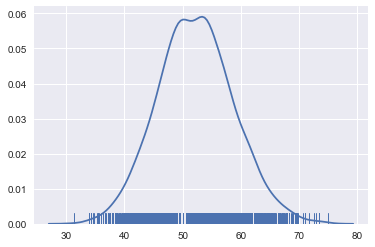

In [63]:
sns.distplot(x, hist=False, rug=True)

# Histogram Plots

In [107]:
temp = db.testing_data.find()
#temp = db.testing_data.find({'Team': 'LAL'})
temp = list(temp)
for i in temp:
    i.pop('_id', None)
df_test = pd.DataFrame(temp)

In [65]:
temp = db.training_data.find()
#temp = db.testing_data.find({'Team': 'LAL'})
temp = list(temp)
for i in temp:
    i.pop('_id', None)
df_train = pd.DataFrame(temp)

In [67]:
df_train.columns

Index(['AST%', 'AST/TO', 'ASTRatio', 'DREB%', 'DefRtg', 'FTARate', 'GameDate',
       'MIN', 'MatchUp', 'NetRtg', 'OREB%', 'OffRtg', 'OppFTARate', 'OppOREB%',
       'OppTOV%', 'OppeFG%', 'PACE', 'PIE', 'REB%', 'TOV%', 'TS%', 'Team',
       'W/L', 'eFG%'],
      dtype='object')

In [68]:
df_train = df_train[['AST%', 'AST/TO', 'ASTRatio', 'DREB%', 'DefRtg', 'FTARate', 'OREB%', 'OffRtg', 'OppFTARate', 'OppOREB%',
                     'OppTOV%', 'OppeFG%', 'PACE', 'PIE', 'REB%', 'TOV%', 'TS%', 'eFG%', 'Team']]

In [69]:
df_test = df_test[['AST%', 'AST/TO', 'ASTRatio', 'DREB%', 'DefRtg', 'FTARate', 'OREB%', 'OffRtg', 'OppFTARate', 'OppOREB%',
                     'OppTOV%', 'OppeFG%', 'PACE', 'PIE', 'REB%', 'TOV%', 'TS%', 'eFG%', 'Team']]

In [71]:
result = pd.concat([df_train, df_test])

In [72]:
len(result)

3946

In [124]:
temp = db.testing_data.find({'GameDate': {'$lte': '2019-01-28T00:00:00.000Z'}}).sort('GameDate',pymongo.DESCENDING).limit(1)

In [140]:
temp = db.testing_data.find().sort('GameDate',pymongo.DESCENDING).limit(1)

In [141]:
date_index = temp[0]['GameDate']

In [142]:
date_index

'2019-01-29T00:00:00.000Z'

In [146]:
temp_df = df_test.loc[df_test['GameDate'] > date_index]

In [147]:
len(temp_df)

0

In [139]:
result_new.loc[result_new['GameDate'] > date_index]

,Team,MatchUp,GameDate,W/L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,...,TOV%,eFG%,TS%,PACE,PIE,FTARate,OppeFG%,OppFTARate,OppTOV%,OppOREB%
0,DAL,DAL @ NYK,2019-01-30,W,48,118.8,92.8,26.0,68.9,1.63,...,19.8,62.5,64.2,96.5,62.7,0.131,44.9,0.359,12.4,13.7
1,CHA,CHA @ BOS,2019-01-30,L,48,97.9,134.0,-36.1,51.3,1.67,...,12.5,51.1,51.0,95.0,30.8,0.079,62.2,0.178,12.8,39.0
2,NYK,NYK vs. DAL,2019-01-30,L,48,92.8,118.8,-26.0,50.0,1.33,...,12.4,44.9,49.8,96.5,37.3,0.359,62.5,0.131,19.8,26.8
3,CHI,CHI @ MIA,2019-01-30,W,48,112.9,95.7,17.2,65.0,2.00,...,14.0,56.4,60.2,93.0,61.4,0.269,44.9,0.146,16.1,32.1
4,MIA,MIA vs. CHI,2019-01-30,L,48,95.7,112.9,-17.2,64.7,1.47,...,16.1,44.9,47.0,93.0,38.6,0.146,56.4,0.269,14.0,17.1
5,BOS,BOS vs. CHA,2019-01-30,W,48,134.0,97.9,36.1,68.0,2.83,...,12.8,62.2,64.9,95.0,69.2,0.178,51.1,0.079,12.5,21.2
6,PHX,PHX @ SAS,2019-01-29,L,48,122.8,123.5,-0.8,54.2,1.44,...,17.8,68.1,70.2,101.5,51.7,0.238,54.5,0.200,10.8,35.2
7,OKC,OKC @ ORL,2019-01-29,W,48,124.8,114.7,10.0,51.0,3.57,...,6.9,58.8,61.5,101.5,55.9,0.286,50.0,0.176,11.8,33.3
8,ORL,ORL vs. OKC,2019-01-29,L,48,114.7,124.8,-10.0,59.1,2.17,...,11.8,50.0,53.2,101.5,44.1,0.176,58.8,0.286,6.9,17.8
9,CLE,CLE vs. WAS,2019-01-29,W,48,113.7,111.9,1.8,66.7,1.88,...,15.7,62.5,61.3,101.5,49.4,0.286,55.2,0.264,5.9,8.7


In [158]:
def update_testing_db(df_new):
    # create mongo db connection
    conn = 'mongodb://localhost:27017'
    client = pymongo.MongoClient(conn)
    # connect to my nba data db
    db = client.nba_data_db
    # Find latest boxscore date
    temp = db.testing_data.find().sort('GameDate',pymongo.DESCENDING).limit(1)
    date_index = temp[0]['GameDate']
    df_update = df_new.loc[df_new['GameDate'] > date_index]
    update_length = len(df_update)
    if update_length > 0:
        print(f'Updating testing_db with {update_length}')
        #for index, row in df_update.iterrows():
            #print(row['MatchUp'])
        items = df_update.to_json(orient='records', date_format='iso')
        # Load to json
        items_db = json.loads(items)
        #print(items)
        # insert data to collection
        db.testing_data.insert_many(items_db)
    else:
        print('No records to update!')
    return update_length

In [159]:
update_testing_db(result_new)

Updating testing_db with 6
DAL @ NYK
CHA @ BOS
NYK vs. DAL
CHI @ MIA
MIA vs. CHI
BOS vs. CHA
[{"Team":"DAL","MatchUp":"DAL @ NYK","GameDate":"2019-01-30T00:00:00.000Z","W\/L":"W","MIN":48,"OffRtg":118.8,"DefRtg":92.8,"NetRtg":26.0,"AST%":68.9,"AST\/TO":1.63,"ASTRatio":22.5,"OREB%":26.8,"DREB%":86.3,"REB%":59.8,"TOV%":19.8,"eFG%":62.5,"TS%":64.2,"PACE":96.5,"PIE":62.7,"FTARate":0.131,"OppeFG%":44.9,"OppFTARate":0.359,"OppTOV%":12.4,"OppOREB%":13.7},{"Team":"CHA","MatchUp":"CHA @ BOS","GameDate":"2019-01-30T00:00:00.000Z","W\/L":"L","MIN":48,"OffRtg":97.9,"DefRtg":134.0,"NetRtg":-36.1,"AST%":51.3,"AST\/TO":1.67,"ASTRatio":15.7,"OREB%":21.2,"DREB%":61.0,"REB%":38.7,"TOV%":12.5,"eFG%":51.1,"TS%":51.0,"PACE":95.0,"PIE":30.8,"FTARate":0.079,"OppeFG%":62.2,"OppFTARate":0.178,"OppTOV%":12.8,"OppOREB%":39.0},{"Team":"NYK","MatchUp":"NYK vs. DAL","GameDate":"2019-01-30T00:00:00.000Z","W\/L":"L","MIN":48,"OffRtg":92.8,"DefRtg":118.8,"NetRtg":-26.0,"AST%":50.0,"AST\/TO":1.33,"ASTRatio":13.3,"OREB%

In [173]:
def update_nba_stats():
    # create mongo db connection
    conn = 'mongodb://localhost:27017'
    client = pymongo.MongoClient(conn)
    # connect to my nba data db
    db = client.nba_data_db
    # Get training data
    temp = db.training_data.find()
    temp = list(temp)
    for i in temp:
        i.pop('_id', None)
    df_train = pd.DataFrame(temp)
    # Get training data
    temp = db.testing_data.find()
    temp = list(temp)
    for i in temp:
        i.pop('_id', None)
    df_test = pd.DataFrame(temp)
    df_winloss = pd.concat([df_train, df_test])
    df_winloss = df_winloss.groupby(['W/L'])['AST%', 'AST/TO', 'ASTRatio', 'DREB%', 
                                     'DefRtg','OREB%', 'OffRtg', 'PACE', 
                                     'PIE', 'REB%', 'TOV%','TS%',
                                     'eFG%', 'FTARate', 'OppFTARate', 'OppOREB%',
                                     'OppTOV%', 'OppeFG%'].mean()
    df_winloss = df_winloss.reset_index()
    db.nba_stats_data.drop()
    # export to json
    items = df_winloss.to_json(orient='records')
    # load json string to json
    items_db = json.loads(items)
    # insert data to collection
    db.nba_stats_data.insert_many(items_db)
    return(df_winloss)

In [174]:
my_df = update_nba_stats()

In [175]:
my_df.head()

,W/L,AST%,AST/TO,ASTRatio,DREB%,DefRtg,OREB%,OffRtg,PACE,PIE,REB%,TOV%,TS%,eFG%,FTARate,OppFTARate,OppOREB%,OppTOV%,OppeFG%
0,L,57.755264,1.622368,16.264786,72.429421,113.935013,25.943778,102.597481,99.09196,43.091486,48.117733,14.750227,52.941461,49.381612,0.248024,0.269676,27.571537,13.992343,55.186297
1,W,59.957531,1.962625,18.231688,74.057733,102.597481,27.571537,113.935013,99.09196,56.908967,51.883073,13.992343,58.669924,55.186297,0.269676,0.248024,25.943778,14.750227,49.381612


In [167]:
date_index

'2019-01-29T00:00:00.000Z'

In [168]:
type(date_index)

str

In [169]:
import dateutil.parser
yourdate = dateutil.parser.parse(date_index)

In [172]:
yourdate.strftime('%m/%d/%Y')

'01/29/2019'

In [185]:
# create mongo db connection
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
# connect to my nba data db
db = client.nba_data_db
# Find latest boxscore date
count = db.testing_data.count_documents({})
print(count)
if count != 0:
    temp = db.testing_data.find().sort('GameDate',pymongo.DESCENDING).limit(1)
    date_index = temp[0]['GameDate']
else:
    date_index = None
print(date_index)

1522
2019-01-30T00:00:00.000Z


In [180]:
mytemp = None
print(mytemp)

None


In [181]:
if(mytemp == None):
    print("True")

True
